## Por qué programar en Julia? 

- Es un lenguaje rápido, como C, C++, Rust, Fortran, etc...

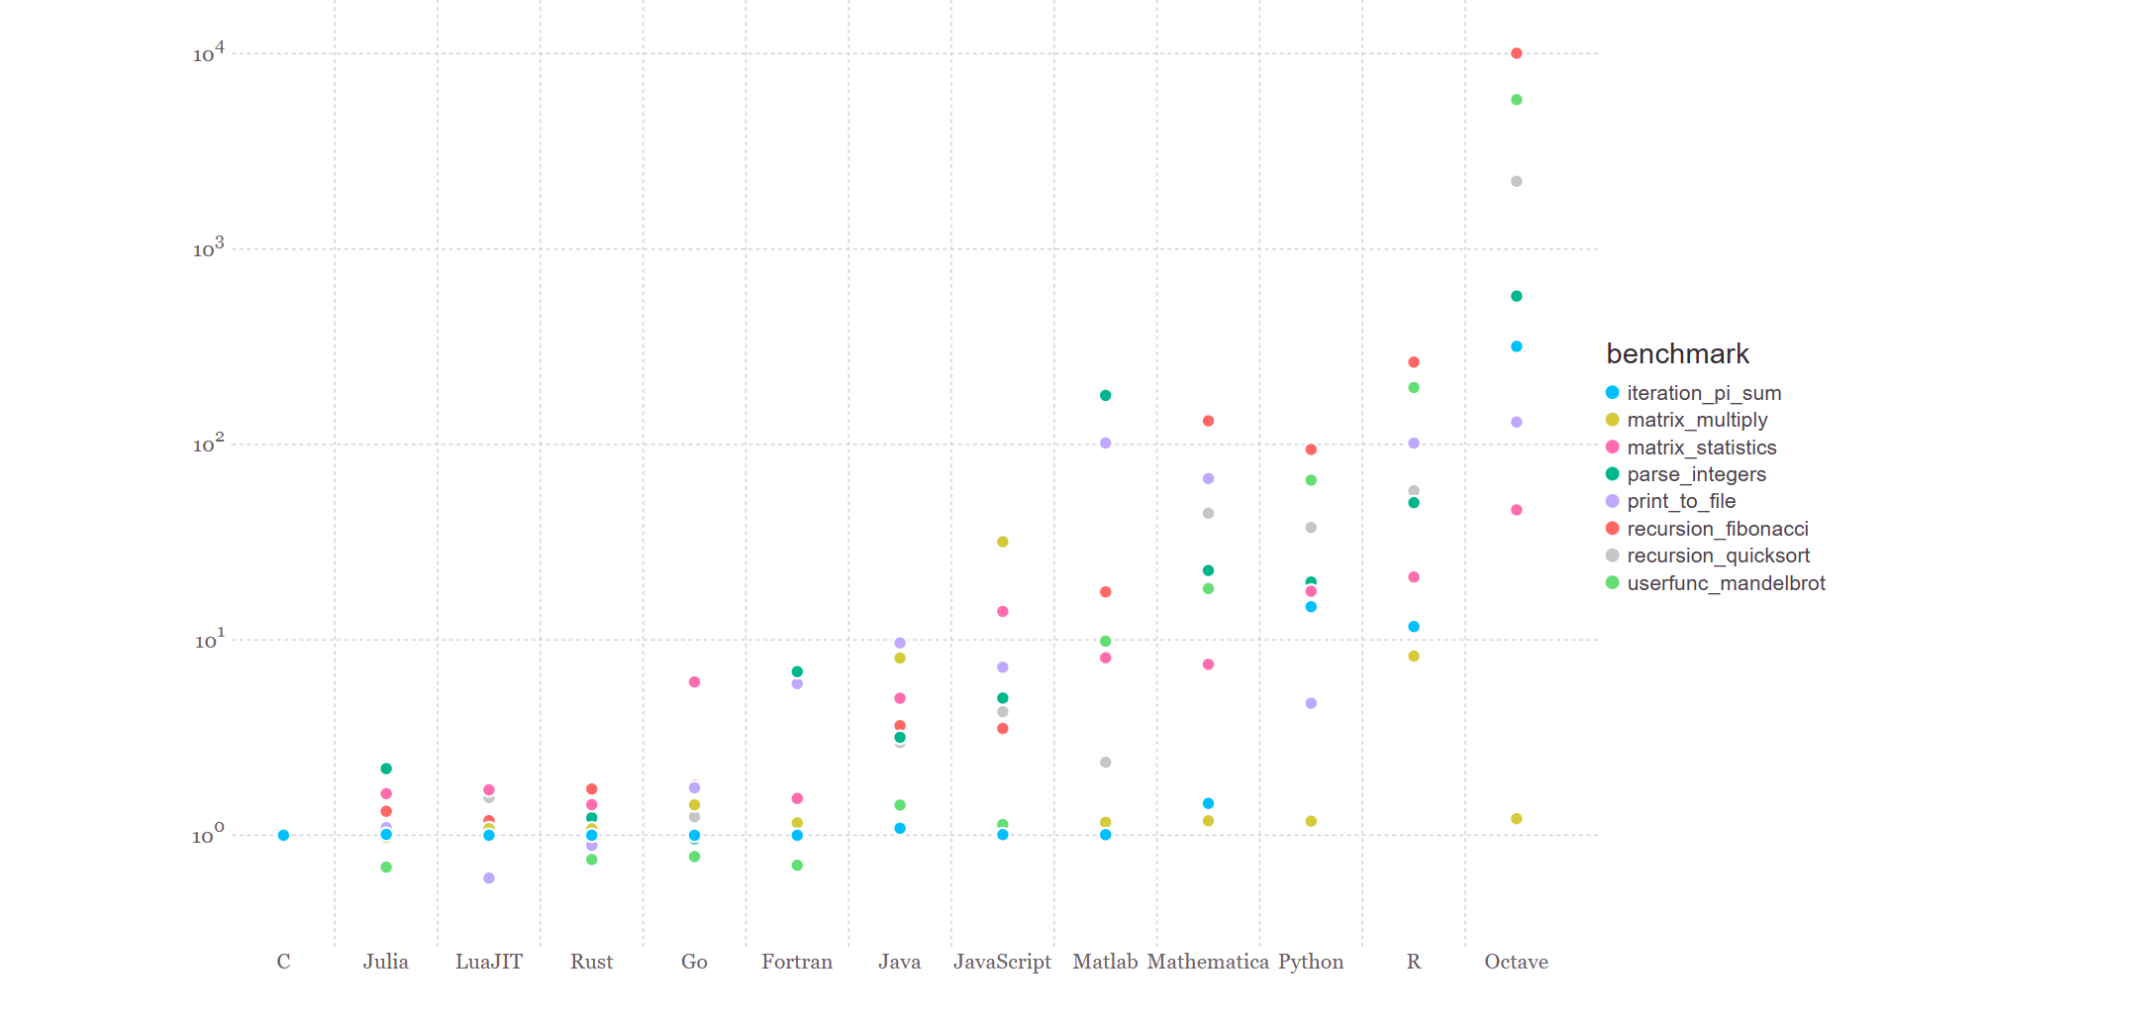

Julia es un lenguaje compilado, lo que hace que Julia sea en promedio casi tan rápido como C, que es de los lenguajes más rápidos. 


Lenguajes compilados vs lenguajes interpretados

Los lenguajes compilados requieren pasar por un proceso de compilación donde generan un archivo ejecutable. Esto quiere decir que una vez que se terminó de escribir el programa en su respectivo código fuente, el compilador traduce todo a lenguaje binario. Una vez traducido todo a una especie de máquina de Turing, se revizan subcadenas que sean redundantes. Es decir, que produzcan el mismo efecto que una cadena más sencilla (y por lo tanto más rápida). Este proceso es el optimizador. Una vez optimizado, se genera el ejecutable, es decir, el archivo binario final. Después uno tiene que correr el ejecutable para poner a funcionar el programa. 

En contraste, los lenguajes interpretados traducen y ejecutan directamente el código fuente. Pareciera como que hacen lo mismo y casi, pero no. La estructura de su código fuente les permite traducir y ejecutar directamente. 

La diferencia entre ambos tipos de lenguaje sería como hacer traducción de un video completo o hacer traducción simultanea en una conferencia. 

Lenguajes como C, C++, Fortran, o Rust, son lenguajes compilados y por eso son rápidos. 


Lenguajes como Python, Matlab, Mathematica u Octave, son lenguajes interpretados.

En este último caso cada vez que se corre una celda se hace la traducción y por eso son lentos. 

¿Cuál es la ventaja de los lenguajes interpretados? 

La ventaja es que son más amigables a programarse. En los lenguajes compilados uno tiene que pensar todo el código en su conjunto. Cada parte del programa se tiene que correr junto con el programa en conjunto y ver si funciona. Eso eso dificulta la programación. En los lenguajes orientados a objetos uno puede hacer sus objetos en archivos diferentes y cargarlos en el archivo final, pero es igual tedioso. Se tienen que tener 20 archivos abiertos donde uno va probando todo para después juntarlos finalmente en el archivo final. Además, es tedioso que uno tiene que compilar y después buscar el ejecutable y correrlo. No es que lleve mucho tiempo, pero en cada prueba se tiene que hacer ese paso intermedio de compilar, que lleva entre segundos y minutos dependiendo de qué tan grande es el código. Entonces, correr los programas es rápido, pero hacerlos es bastante más tedioso y lento. 

Muchas veces los programas tardan unos pocos minutos en correr, mientras que hacer el programa en sí lleva semanas o meses. Por eso, la filosofía de los lenguajes interpretados fue la de hacer más sencillo el programar, aunque eso tuviera un costo en la eficicenta de los programas.


Son fáciles de programar

Los primeros lenguajes interpretados no tuvieron tanto éxito, pero sin duda lenguajes como Matlab, Maple o Mathematica han sido bastante útiles y la llegada de python generó un gran boom en el desarrollo de software. Parte del truco de python es que los programas en python están en gran medida hechos en C y python es la interface. Es un lenguaje interpretado, pero como ven, es entre los interpretados de los más rápidos y la razón es justamente esa. Por ejemplo, las operaciones entre matrices en Python no están escritas en python, sino en C y eso incluye las operaciones básicas, pero también los cálculos con matrices gigantes trinagulares, diagonales, tridiagonales, con mayorías de elementos 0's, etc. Muchísimas paqueterías de python son en realidad paqueterías en C, C++ o Fortran.  


Python vs Julia

¿Por qué entonces no quedarons con Python?

El problema es que en el cómputo científico se trata de generar nuevas ideas constantemente, así que aunque las paqueterías simplifican el programar cosas nuevas, muy frecuentemente requerimos hacer código con mucho contenido novedoso. Es verdad que muchos lo que hacen es un tanto ingenieril. Con esto quiero decir que uno tiene una clase de modelos y lo que hace es cambiar condiciones iniciales o algún parámetro, pero aplicando el mismo tipo de modelo. En ese caso python suele estar aceptablemente bien, porque en realidad python pasa a ser sólo una interface del verdadero software que está escrito en un lenguaje compilado. Pero cuando lo que uno quiere es proponer una nueva clase de modelos, obviamente si son nuevos modelos, no están programados y por lo tanto el código debe ser escrito en su mayoría desde la base y en ese caso Python se vuelve muy lento, porque está escrito realmente en python, es decir, es realmente un lenguaje interpretado. 

Julia decidió que iba a seguir la filosofía de python o matlab, pero compilando. Entonces, se ve como interpretado, pero en realidad es casi-compilado. Cada vez que se hace una nueva función y se corre, esta se compila con el tipo de objetos que se usó al correr la función. Se hace un ejecutable (que está oculto) y que toma ciertos argumentos (la cinta de la maquina de turing tiene unos espacios en blanco que son para los argumentos que se den). La siguiente vez que se usa la función, ya no se tiene que compilar, a menos que los argumentos tengan otra clase de objetos. Esto hace que la primera vez que se corre una celda es lento como python (y quizá un poco más), pero después ya guardó la información sobre la función en código máquina. 

In [1]:
using LLVM

function ejemplo(x)
    return x^2 + 1
end

codigo_nativo = @code_native ejemplo(3) 

println(codigo_nativo)

	.text
	.file	"ejemplo"
	.globl	julia_ejemplo_655               # -- Begin function julia_ejemplo_655
	.p2align	4, 0x90
	.type	julia_ejemplo_655,@function
julia_ejemplo_655:                      # @julia_ejemplo_655
; ┌ @ In[1]:3 within `ejemplo`
	.cfi_startproc
# %bb.0:                                # %top
	push	rbp
	.cfi_def_cfa_offset 16
	.cfi_offset rbp, -16
	mov	rbp, rsp
	.cfi_def_cfa_register rbp
; │ @ In[1]:4 within `ejemplo`
; │┌ @ intfuncs.jl:332 within `literal_pow`
; ││┌ @ int.jl:88 within `*`
	imul	rcx, rcx
; │└└
; │┌ @ int.jl:87 within `+`
	lea	rax, [rcx + 1]
; │└
	pop	rbp
	ret
.Lfunc_end0:
	.size	julia_ejemplo_655, .Lfunc_end0-julia_ejemplo_655
	.cfi_endproc
; └
                                        # -- End function
	.section	".note.GNU-stack","",@progbits
nothing


No me pregunten como se lee todo eso. No tengo idea. Pero es el código nativo que se lleva directamente al lenguaje máquina. 

Es decir, Julia es un lenguaje casi tan rápido como C o Fortran, pero con la filosofía de hacerlo sencillo de programar. 

Tiene aún algunas desventajas. La primera de ellas es que no es tan exportable como python. No hay aún Julia para android, por ejemplo. Hay avances en el desarrollo de aplicaciones web, que podrían usarse en android, pero no hay realmente Julia en sistema android. Además, Python es el lenguaje más popular en el mundo, así que es relativamente fácil encontrar código ya hecho para algo similar a lo que quieren hacer, casi sea lo que sea que quieran hacer. Así que no es que Julia sea la solución a todo, pero para cómputo científico, es el mejor. Es fácil de programarse y rápido. 

### Seudocódigo a Julia

Julia además es bastante intuitivo. Prácticamente lo que escriben en metacódigo lo pueden hacer en código. 

¿Cómo programar una derivada numérica? 

In [2]:
d(f, x, Δx = 1e-4) = (f(x+Δx)-f(x))/Δx 

d (generic function with 2 methods)

In [3]:
f(x) = cos(x)
d(f, 0.32), -sin(0.32)

(-0.3146140218623916, -0.31456656061611776)

¿Una integral numérica? 

In [4]:
∑(x) = sum(x)
∫(f, a,b, Δx = (b-a)/1000) = ∑(f(x) for x in a:Δx:b)*Δx

∫ (generic function with 2 methods)

In [5]:
∫(f, 0, π/3), sin(π/3)

(0.8668107228059077, 0.8660254037844386)

Función que cheque si un número es primo o no

In [6]:
function es_primo(n)
    for i in 2:sqrt(n)
        if mod(n,i) == 0
            return false
        end
    end
    return true
end

es_primo (generic function with 1 method)

In [7]:
for i in 2:100
    if es_primo(i)
        println("este es el primo $i")
    end
end

este es el primo 2
este es el primo 3
este es el primo 5
este es el primo 7
este es el primo 11
este es el primo 13
este es el primo 17
este es el primo 19
este es el primo 23
este es el primo 29
este es el primo 31
este es el primo 37
este es el primo 41
este es el primo 43
este es el primo 47
este es el primo 53
este es el primo 59
este es el primo 61
este es el primo 67
este es el primo 71
este es el primo 73
este es el primo 79
este es el primo 83
este es el primo 89
este es el primo 97


Espero que con estos ejemplos ya vayan adquiriendo cierta práctica y descubriendo lo intuitivo de Julia. 

## Documentación

La documentación completa la pueden encontrar en la página de Julia.

https://julialang.org/

Vale la pena que la revisen. Ahí tendrán muchos tips bastante buenos sobre lo que pueden hacer. 

Pero si lo que quieren saber algo sobre una función, les recomiendo usar ?

In [8]:
?  replace

search: replace replace! replacefield! replace_uses! replaceproperty!



```
replace(A, old_new::Pair...; [count::Integer])
```

Return a copy of collection `A` where, for each pair `old=>new` in `old_new`, all occurrences of `old` are replaced by `new`. Equality is determined using [`isequal`](@ref). If `count` is specified, then replace at most `count` occurrences in total.

The element type of the result is chosen using promotion (see [`promote_type`](@ref)) based on the element type of `A` and on the types of the `new` values in pairs. If `count` is omitted and the element type of `A` is a `Union`, the element type of the result will not include singleton types which are replaced with values of a different type: for example, `Union{T,Missing}` will become `T` if `missing` is replaced.

See also [`replace!`](@ref), [`splice!`](@ref), [`delete!`](@ref), [`insert!`](@ref).

!!! compat "Julia 1.7"
    Version 1.7 is required to replace elements of a `Tuple`.


# Examples

```jldoctest
julia> replace([1, 2, 1, 3], 1=>0, 2=>4, count=2)
4-element Vector{Int64}:
 0
 4
 1
 3

julia> replace([1, missing], missing=>0)
2-element Vector{Int64}:
 1
 0
```

---

```
replace(new::Union{Function, Type}, A; [count::Integer])
```

Return a copy of `A` where each value `x` in `A` is replaced by `new(x)`. If `count` is specified, then replace at most `count` values in total (replacements being defined as `new(x) !== x`).

!!! compat "Julia 1.7"
    Version 1.7 is required to replace elements of a `Tuple`.


# Examples

```jldoctest
julia> replace(x -> isodd(x) ? 2x : x, [1, 2, 3, 4])
4-element Vector{Int64}:
 2
 2
 6
 4

julia> replace(Dict(1=>2, 3=>4)) do kv
           first(kv) < 3 ? first(kv)=>3 : kv
       end
Dict{Int64, Int64} with 2 entries:
  3 => 4
  1 => 3
```

---

```
replace([io::IO], s::AbstractString, pat=>r, [pat2=>r2, ...]; [count::Integer])
```

Search for the given pattern `pat` in `s`, and replace each occurrence with `r`. If `count` is provided, replace at most `count` occurrences. `pat` may be a single character, a vector or a set of characters, a string, or a regular expression. If `r` is a function, each occurrence is replaced with `r(s)` where `s` is the matched substring (when `pat` is a `AbstractPattern` or `AbstractString`) or character (when `pat` is an `AbstractChar` or a collection of `AbstractChar`). If `pat` is a regular expression and `r` is a [`SubstitutionString`](@ref), then capture group references in `r` are replaced with the corresponding matched text. To remove instances of `pat` from `string`, set `r` to the empty `String` (`""`).

The return value is a new string after the replacements.  If the `io::IO` argument is supplied, the transformed string is instead written to `io` (returning `io`). (For example, this can be used in conjunction with an [`IOBuffer`](@ref) to re-use a pre-allocated buffer array in-place.)

Multiple patterns can be specified, and they will be applied left-to-right simultaneously, so only one pattern will be applied to any character, and the patterns will only be applied to the input text, not the replacements.

!!! compat "Julia 1.7"
    Support for multiple patterns requires version 1.7.


!!! compat "Julia 1.10"
    The `io::IO` argument requires version 1.10.


# Examples

```jldoctest
julia> replace("Python is a programming language.", "Python" => "Julia")
"Julia is a programming language."

julia> replace("The quick foxes run quickly.", "quick" => "slow", count=1)
"The slow foxes run quickly."

julia> replace("The quick foxes run quickly.", "quick" => "", count=1)
"The  foxes run quickly."

julia> replace("The quick foxes run quickly.", r"fox(es)?" => s"bus\1")
"The quick buses run quickly."

julia> replace("abcabc", "a" => "b", "b" => "c", r".+" => "a")
"bca"
```


También pueden tratar de adivinar y autocompletar con TAB

## Enunciados en Julia

Julia intenta ser un lenguaje casi natural, así que tiene algo así como el sujeto y el predicado, o más bien, como los verbos y los sustantivos. 



### Verbos

Los verbos son las funciones. Ya vimos un poco sobre cómo se hacen las funciones: 

In [9]:
área_círculo(r) = π*r^2  

área_círculo (generic function with 1 method)

In [10]:
área_círculo(3.2) 

32.169908772759484

In [11]:
área(r) = área_círculo(r)
área(b,h) = b*h
área(b,h) = b*h/2

área (generic function with 2 methods)

In [12]:
área(3.2), área(2,3)

(32.169908772759484, 3.0)

In [13]:
saludo(nombre, despedida = false) = despedida ? "nos vemos $nombre" : "hola $nombre"

saludo (generic function with 2 methods)

In [14]:
saludo("Pavel"), saludo("Rodrigo", true)

("hola Pavel", "nos vemos Rodrigo")

In [15]:
área_triángulo(b,h) = b*h/2
área_rectángulo(b,h) = b*h
área_cuadrado(l) = área_rectángulo(l,l)

funciones_de_areas = Dict(:triángulo => área_triángulo, 
:circulo  => área_círculo,  :rectángulo => área_rectángulo, 
:cuadrado  => área_cuadrado)

Dict{Symbol, Function} with 4 entries:
  :triángulo  => área_triángulo
  :circulo    => área_círculo
  :rectángulo => área_rectángulo
  :cuadrado   => área_cuadrado

In [16]:
funciones_de_areas[:rectángulo](2,3)

6

In [17]:
function área(valores...; tipo::Symbol = :circulo)
    funciones_de_areas[tipo](valores...)
end

área (generic function with 3 methods)

In [18]:
área(3, tipo = :cuadrado)

9

### Ejercicios

[1] Haz una función en una sola línea que encuentre el número de primos relativos menores que $n$

(no uses por ahora una inteligencia artificial)

[2] Haz una función que calcule el área de un polígono dados sus vértices de forma ordenada. 

Usa la fórmula de $$A = \frac 1 2 \sum_{i=1}^n (y_i + y_{i+1})(x_i - x_{i+1})$$

[3] Con la función de cálculo del área de polígono haz una función que calcule el área bajo la curva de una función positiva. 

[4] Ahora haz una función que calcule la integral de cualquier función en un intervalo usando la función de arriba. 

## Sustantivos

En Julia los sustantivos son los objetos o tipos. Nosotros reconoceremos 2 tipos de objetos, abstractos y concretos. 

#### Objetos concretos

Los objetos concretos en julia están definidos por sus características o propiedades. En este grupo entran por ejemplo los números enteros de 64 bits o los flotantes de 64 bits, etc. 

In [34]:
typeof([1 3. 4]), typeof(1.2), typeof([1,3.2]), typeof(1+2im), typeof(1//3), typeof("hola")

(Matrix{Float64}, Float64, Vector{Float64}, Complex{Int64}, Rational{Int64}, String)

Hay varios más, sólo por dar algunos ejemplos: 

In [58]:
typeof(big(31)), typeof(big(1.2)), typeof([1 2; 2 1])

(BigInt, BigFloat, Matrix{Int64})

Además de los que ya existen, uno puede crear sus propios objetos. 

In [73]:
struct MiObjeto{T<: Number} 
    a ::Int64
    b ::Vector{T}
end

MiObjeto(a::Int64) = MiObjeto(a, [a,a])

MiObjeto(;a::Int64 = 1, b::Vector{T} = [1,1]) where T <: Number = MiObjeto(a,b)

MiObjeto

In [70]:
objeto_ata = MiObjeto(1,[1,1])
objeto_daniel = MiObjeto(1)
typeof(objeto_ata)
objeto_daniel, typeof(objeto_daniel)
objeto_daniel2 = MiObjeto(b = [2,1])

MiObjeto{Int64}(1, [2, 1])

In [74]:
objeto_ata.a, objeto_ata.b

(1, [1, 1])

Aquí hay dos cosas importantes a mencionar. 

1. Una vez definido un objeto, no se puede cambiar la definición, a menos que se reinicie el kernel. 

In [75]:
struct MiObjeto
    a ::Int64
    b ::Matrix{Float64}
end

LoadError: invalid redefinition of constant Main.MiObjeto

2. Esta clase de objetos son inmutables, es decir, no se puede modificar sus valores: 

In [76]:
objeto_ata.a = 2

LoadError: setfield!: immutable struct of type MiObjeto cannot be changed

Esto se hace para ahorrar espacio en la memoria y por lo tanto hacer más rápidos los códigos. Sin embargo, a veces se requiere que los objetos puedan mutar. 

Para eso uno define el objeto con mutable struct

In [87]:
mutable struct MiObjetoMutable1 <: ObjetosAta
    a ::Int64 
    b ::Vector{Float64}
end

In [78]:
objeto_ata = MiObjetoMutable(1,[1.2,1])


MiObjetoMutable(1, [1.2, 1.0])

In [79]:
objeto_ata.a = 3
objeto_ata

MiObjetoMutable(3, [1.2, 1.0])

#### Objetos abstractos

Los objetos abstractos son como nodos de una estructura de árbol. Es decir, son clases generales que sólo nos indican un grado de abstracción. 

Por ejemplo, los números son una clase muy abstracta, que contiene a los reales y a los complejos y otros. Dentro de los reales (numéricos) están los racionales, los enteros, y los flotantes, que a su veces contienen a los flotantes de 16 bits, los de 32, los de 64 y los BigFloat. 

In [80]:
function all_subtypes(Tipo, cadena = 0)
    subt = subtypes(Tipo)
    n = length(subt)
    tab = cadena > 0 ? prod(" " for i in 1:cadena) : ""
    for s in subt
        println(tab*"$s")
        all_subtypes(s, cadena+1)
    end
end
         
all_subtypes(Number)

Base.MultiplicativeInverses.MultiplicativeInverse
 Base.MultiplicativeInverses.SignedMultiplicativeInverse
 Base.MultiplicativeInverses.UnsignedMultiplicativeInverse
Complex
Real
 AbstractFloat
  BigFloat
  Float16
  Float32
  Float64
 AbstractIrrational
  Irrational
 Integer
  Bool
  Signed
   BigInt
   Int128
   Int16
   Int32
   Int64
   Int8
  Unsigned
   UInt128
   UInt16
   UInt32
   UInt64
   UInt8
 Rational


In [86]:
Complex <: Number, Complex >: Float64 

abstract type ObjetosAta <: Any end

Esto de las categorías es porque uno puede tener definidas algunas propiedades para toda una categoría de objetos. Por ejemplo, la suma está definido sobre todos los números y más o menos de la misma forma, así que si nosotros tenemos una función que opera sobre dos números, por ejemplo, sumándolos, podemos elegir la categoría más abstracta de Number como la clase de objetos que acepta nuestra función. 

In [88]:
mi_función(a::Number, b::Number) = a+b

mi_función (generic function with 1 method)

In [89]:
mi_función(1+im, 3.22)

4.220000000000001 + 1.0im

Con esto tenemos que ser muy cuidadosos, porque no siempre están bien definidas las operacones y uno tiene que definir los casos particulares aparte. 

### Ejemplos

Números Duales

In [1]:
mutable struct Dual <: Number
    i::Union{Real, Complex}
    d::Union{Real, Complex}
end 

In [93]:
import Base.+, Base.-, Base.*, Base./, Base.^

+(d1::Dual, d2::Dual) = Dual(d1.i+d2.i, d1.d+d2.d)
-(d1::Dual, d2::Dual) = Dual(d1.i-d2.i, d1.d-d2.d)
*(d1::Dual, d2::Dual) = Dual(d1.i*d2.i, d1.i*d2.d+d2.i*d1.d)
/(d1::Dual, d2::Dual) = Dual(d1.i/d2.i, (d2.i*d1.d-d1.i*d2.d)/d2.i^2)
^(d1::Dual, d2::Dual) = Dual(d1.i^d2.i, d1.i^d2.i*(d2.d*log(d1.i)+d2.i* d1.d/d1.i))
+(d1::Dual, d2::Union{Real, Complex}) = Dual(d1.i+d2, d1.d)
+(d2::Union{Real, Complex},d1::Dual) = +(d1, d2)
-(d1::Dual, d2::Union{Real, Complex}) = Dual(d1.i-d2, d1.d)
-(d2::Union{Real, Complex},d1::Dual) =  Dual(d2-d1.i, d1.d)
*(d1::Dual, d2::Union{Real, Complex}) = Dual(d1.i*d2, d1.d*d2)
*(d2::Union{Real, Complex}, d1::Dual) = Dual(d1.i*d2, d1.d*d2)
/(d1::Dual, d2::Union{Real, Complex}) = Dual(d1.i/d2, d1.d/d2)
^(d1::Dual, d2::Union{Real, Complex}) = Dual(d1.i^d2, d2*d1.i^(d2-1)*d1.d)
^(d1::Dual, d2::Integer) = Dual(d1.i^d2, d2*d1.i^(d2-1)*d1.d)
/(d2::Union{Real, Complex}, d1::Dual) = *(d1^(-1), 1/d2)
^(d2::Union{Real, Complex}, d1::Dual) = Dual(d2^d1.i, d2^d1.i*log(d2)*d1.d)


^ (generic function with 81 methods)

In [136]:
using SymPy
@syms x1
f(x) = 3x^4/(x^2-2) - x^3 + x^2-3 - x^x
d(x) = Dual(x, 1)
x = 4.3
f(d(x)).d, N(diff(f(x1), x1)(x1=> x)), dn(f, x)

(-1323.4312528514743, -1323.4312528514743, -1323.5983533184026)

Ok, ya aprendieron a hacer funciones, objetos abstractos y concretos. 

¿Cómo extraigo de un objeto sus propiedades? 

In [97]:
dual = d(x)

Dual(3, 1)

In [139]:
dual.i

3

Pero si queremos obtener las propiedades de maner automática, podemos usar 2 funciones: 

In [140]:
ps_prop = propertynames(objeto_daniel) 

(:a, :b)

In [141]:
fieldnames(Dual)

(:i, :d)

Aquí parece que: 

In [142]:
fieldnames(typeof(dual)) == propertynames(dual) 

true

Pero en general esto no es verdadero.

Déjenme darles un bonito contra-ejemplo: 

In [105]:
using DataFrames, CSV

datos_1 = DataFrame(CSV.File("datos_ficticios.csv"))
datos_2 = DataFrame(CSV.File("datos_ficticios_2.csv")) 

Row,producto,costo
,String15,Int64
1,compu,12000
2,mouse,120
3,cableusb,50
4,usbtera,1150


In [110]:
typeof(datos_1), typeof(datos_2)

(DataFrame, DataFrame)

In [107]:
fieldnames(typeof(datos_1)), fieldnames(typeof(datos_2))

((:columns, :colindex, :metadata, :colmetadata, :allnotemetadata), (:columns, :colindex, :metadata, :colmetadata, :allnotemetadata))

In [108]:
propertynames(datos_1), propertynames(datos_2)

([:alumnos, :calificaciones, :semestre], [:producto, :costo])

In [113]:
datos_1.alumnos

3-element Vector{String15}:
 "Fulanito"
 "Perenganito"
 "Menganita"

In [114]:
datos_2.costo

4-element Vector{Int64}:
 12000
   120
    50
  1150

O sea, los propertynames no coinciden con los fieldnames. Pero hay algo más raro en todo esto. Los propertynames son diferentes para datos_1 y datos_2, cuando ambos son un DataFrame. 

Eso es porque los field son las características de la clase (del strcut), mientras que los property son las características del objeto específico, es decir, de datos_1 y datos_2. Normalmente ambas coinciden, pero uno puede hacer que no coincidan. 


In [ ]:
datos_1.

In [143]:
datos_1.columns

LoadError: ArgumentError: column name :columns not found in the data frame

Para evaluar el field, uno tiene que usar: 

In [146]:
getfield(datos_1, :columns)

3-element Vector{AbstractVector}:
 String15["Fulanito", "Perenganito", "Menganita"]
 [6, 7, 8]
 [3, 3, 4]

mientras que para evaluar una de las propiedades uno usa:

In [147]:
getproperty(datos_1, :alumnos),  datos_1.alumnos

(String15["Fulanito", "Perenganito", "Menganita"], String15["Fulanito", "Perenganito", "Menganita"])

Vamos a dar un ejemplo de cómo modificamos las propiedades particulares de un objeto específico. 

In [117]:
struct MiDataFrame
    columnas::Dict{Symbol, Vector}
    metadata::Dict{Symbol, Any}
end

In [118]:
function MiDataFrame(columnas::Dict{Symbol, Vector})
    metadata = Dict()
    n = length(first(values(columnas)))   
    for col in values(columnas)
        if length(col) != n
            throw(ArgumentError("Todas las columnas deben tener la misma longitud"))
        end
    end
    return MiDataFrame(columnas, metadata)
end

MiDataFrame

In [119]:
import Base.getproperty, Base.propertynames
function Base.getproperty(df::MiDataFrame, name::Symbol)  
    if haskey(getfield(df, :columnas), name)
        return getfield(df, :columnas)[name]
    else
        throw("error de nombre de columan: No existe dicha columna")
    end
end

function Base.propertynames(df::MiDataFrame, private::Bool = false)
    return collect(keys(getfield(df, :columnas)))
end

In [151]:
diccionario = Dict("hola" => ":-D", "adios" => ":-(", 1 => "sé feliz" )
haskey(diccionario, "hola"), haskey(diccionario, "saludos")   

(true, false)

In [150]:
diccionario["adios"]

"sé feliz"

In [152]:
columnas = Dict(:A => [1, 2, 3], :B => [4., 5, 6])
df = MiDataFrame(columnas) 

MiDataFrame(Dict{Symbol, Vector}(:A => [1, 2, 3], :B => [4.0, 5.0, 6.0]), Dict{Symbol, Any}())

In [156]:
typeof(df), fieldnames(MiDataFrame)
propertynames(df)

2-element Vector{Symbol}:
 :A
 :B

In [127]:
fieldnames(MiDataFrame) 

(:columnas, :metadata)

#### Ejercicios

[5] Haz un objeto mutable Persona que tenga como propiedades: un identificador (Int) la edad (Int), el sex (Symbol),  el grado de enfermedad (Symbol), el número de días en el estado de la enfermedad (Int), la posición (Tuple{Real, Real}), una lista de conocidos (Vector{Int}). 

[6] Modifica la función getproperty y propertynames para que en caso de que el grado de enfermedad sea :muerto, entonces sólo haya la propiedad de identificador. Si el grado es :sano, entonces la propiedad de número de días en el estado desaparece, con el resto de los estados se tienen todas las propiedades. 

[7] Modifica la función + para que si se suma una Tuple{Real, Real} a una persona, lo que se haga sea actualizar la posición de la persona, excepto si la persona está en estado :muerto. 